In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [31]:
def spin_pol_ratio(n_up, n_down):
    """Calculate the spin polarization ratio."""
    return (n_up - n_down) / (n_up + n_down)

In [32]:
def n_B(n_up, n_down):
    """Calculate the total density of states."""
    return n_up + n_down

In [33]:
def n_up(n_B, spin_pol_ratio):
    """Calculate the spin-up density of states."""
    return n_B * (1 + spin_pol_ratio) / 2

def n_down(n_B, spin_pol_ratio):
    """Calculate the spin-down density of states."""
    return n_B * (1 - spin_pol_ratio) / 2

In [34]:
def k_F(n):
    return (6*np.pi**2*n)**(1/3)

In [42]:
def total_Energy_integrand(k,k_F):
    
    if k > k_F or k == 0:
        return 0
    
    if k == k_F:
        E_kF = (k_F**2 / 2.0) - (k_F / np.pi)
        volume_factor_at_kF = 4.0 * np.pi * k_F**2
        return volume_factor_at_kF * E_kF
    
    volume_factor = 4*np.pi*k**2
    kinetic_factor = k**2 / 2
    log_term = np.log((k_F + k) / (k_F - k))
    E_ex = (k_F / np.pi) * (1.0 + 0.5 * (k_F / k - k / k_F) * log_term)

    return volume_factor * (kinetic_factor - E_ex)

In [43]:
def integrate_total_energy(k_F):
    result, error = integrate.quad(total_Energy_integrand, 0, k_F, args=(k_F,))
    return result 

In [72]:
zeta_values = np.linspace(0,1,100)
n_B_values = np.linspace(0.00001,0.05,100)

### Aufgabe b): calculate Total Energy

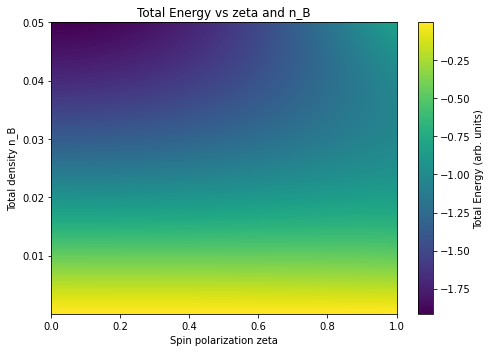

In [73]:
# Compute total energy for each (zeta, n_B) pair and plot a heatmap
energy_grid = np.zeros((len(n_B_values), len(zeta_values)))

for i, n_B in enumerate(n_B_values):
    for j, zeta in enumerate(zeta_values):
        # use helper functions defined above to get spin-resolved densities
        n_up_val = n_up(n_B, zeta)
        n_down_val = n_down(n_B, zeta)

        # Fermi wavevectors for each spin channel
        k_F_up = k_F(n_up_val)
        k_F_down = k_F(n_down_val)

        # integrate the energy for each Fermi sphere and sum
        E_up = integrate_total_energy(k_F_up)
        E_down = integrate_total_energy(k_F_down)

        energy_grid[i, j] = E_up + E_down

# Plot heatmap: x-axis zeta, y-axis n_B
plt.figure(figsize=(7,5))
im = plt.imshow(energy_grid, origin='lower', aspect='auto',
                extent=[zeta_values[0], zeta_values[-1], n_B_values[0], n_B_values[-1]])
plt.colorbar(im, label='Total Energy (arb. units)')
plt.xlabel('Spin polarization zeta')
plt.ylabel('Total density n_B')
plt.title('Total Energy vs zeta and n_B')
plt.tight_layout()
plt.show()

### Aufgabe c): Identify the zeta with lowest energy for each n_B

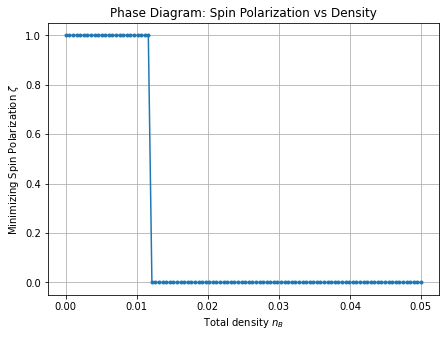

In [74]:
# Find the index of the minimum energy for each n_B value (along the zeta-axis, axis=1)
min_energy_indices = np.argmin(energy_grid, axis=1)

# Get the corresponding zeta values for those minimum indices
min_zeta_values = zeta_values[min_energy_indices]

# Create the plot of zeta vs n_B
plt.figure(figsize=(7, 5))
plt.plot(n_B_values, min_zeta_values, marker='.', linestyle='-')
plt.xlabel('Total density $n_B$')
plt.ylabel('Minimizing Spin Polarization $\zeta$')
plt.title('Phase Diagram: Spin Polarization vs Density')
plt.grid(True)
plt.ylim(-0.05, 1.05) # Set y-axis to go from 0 to 1
plt.show()

### Interpretation:

when zeta = 1, all the electrons have the same spin 
when zeta = 0, there are the same amount of spin down as spin up electrons

this means that somewhere, it switches from favouring a finite magnetization to a magentization of 0. 

The system at first favours the same spin in the exchange interaction because its lowers the energy. 

At the same time, having electrons have the same spin means that the kinetic energy increases because k increases as a square, meaning if you have all the electrons in the one spin as opposed to a 50/50 you have a 2**(1/3) increase in the radius of k_F. 

This is the Stoner criterium in action.